Doing elastic net with statsmodels package insted of sklearn

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
import os
import copy
import seaborn as sns
from sklearn.linear_model import enet_path
import matplotlib.pyplot as plt
from itertools import cycle
from random import choice
import copy
import glmnet_python
from glmnet import glmnet

In [6]:
p_MRS=np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_Placebo_MRS', allow_pickle=True)
k_MRS=np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_Ketamine_MRS',allow_pickle=True)

In [7]:
Y_k=np.asarray(k_MRS)

In [8]:
X_3_k= np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_3_k.npy', allow_pickle=True)
X_3_p= np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_3_p.npy', allow_pickle=True)

In [9]:
!pip install statsmodels

In [10]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import time

Fitting a model in statsmodels typically involves 3 easy steps:

1. Use the model class to describe the model

2. Fit the model using a class method

3. Inspect the results using a summary method

In [11]:
# alphas in log space, get a training (21p) and test (6p) sets!
# you need cv for your lambda(alpha)



In [12]:
k_MRS

,difference_24h_baseline
1,-0.353290
2,0.033363
4,0.040833
5,0.156934
7,0.293444
14,0.083235
16,-0.058575
18,-0.042531
19,0.336972
20,-0.005448


In [13]:
k_MRS_arr=np.asarray(k_MRS['difference_24h_baseline'])

Getting test and training set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_3_k, k_MRS_arr, test_size=0.25, random_state=42)

In [15]:
X_train.shape

(20, 180)

In [16]:
X_test.shape

(7, 180)

Standardize data? Automatically?

The terms normalization and standardization are sometimes used interchangeably, but they usually refer to different things. Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1. This standardization is called a z-score, and data points can be standardized with the following formula:

what do I want to know - are any features predictive for MRS results - if yes what is the function to predict - to avoid overfitting look at test error!

In [ ]:
!pip install glmnet

Elastic Net - CV for alpha

Computing regularization path using the coordinate descent elastic net...


<IPython.core.display.Javascript object>


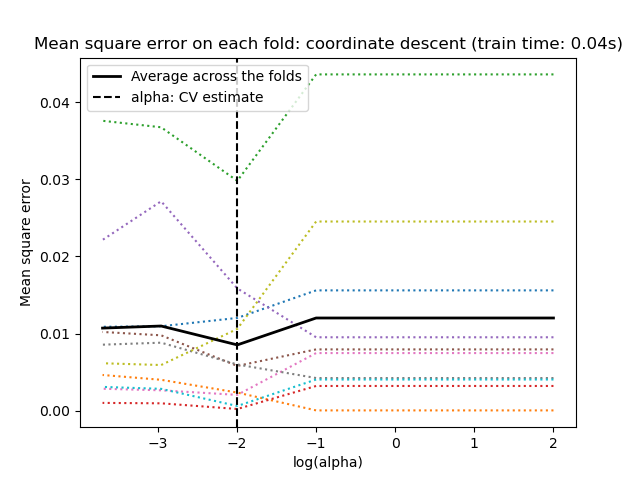

Text(0.5, 1.0, 'Mean square error on each fold: coordinate descent (train time: 0.04s)')

In [63]:
%matplotlib notebook
# LassoCV: coordinate descent
# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4
# Compute paths
print("Computing regularization path using the coordinate descent elastic net...")
t1 = time.time()
# alphas in log space, get a training (21p) and test (6p) sets!
#you need
model = ElasticNetCV(cv=10, alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],random_state=0, normalize=True, l1_ratio=0.5).fit(X_train, y_train)
t_elastic_cv = time.time() - t1

# Display results
m_log_alphas = np.log10(model.alphas_ + EPSILON)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_elastic_cv)

In [65]:
model.alpha_

0.01

In [67]:
model.path(X_train, y_train, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], precompute='auto', Xy=None, copy_X=True, coef_init=None, verbose=False, return_n_iter=False, positive=False, check_input=True)           

(array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
 array([[-0.        , -0.        , -0.        , ..., -0.        ,
         -0.0278494 , -0.00678973],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.01449161, -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.0932985 , -0.28632984],
        ...,
        [-0.        , -0.        , -0.        , ..., -0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ]]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.70034870e-06, 2.22636561e-05]))

In [68]:
mod = sm.OLS(y_train, X_train) 

In [69]:
res = mod.fit()

In [70]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 05 May 2020   Prob (F-statistic):                nan
Time:                        11:34:20   Log-Likelihood:                 701.00
No. Observations:                  20   AIC:                            -1362.
Df Residuals:                       0   BIC:                            -1342.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0783        inf         -0        n

C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\statsmodels\regression\linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\canlab\Anaconda3\envs\py37\lib\site-packages\statsmo

In [71]:
e_res=mod.fit_regularized(method='elastic_net', alpha=0.01, L1_wt=0.5, start_params=None, profile_scale=False, refit=False)

In [74]:
e_res

# Trying out glmnet

In [2]:
import sys
sys.path.append('../test')
sys.path.append('../lib')
import scipy, importlib, pprint, matplotlib.pyplot as plt, warnings
from glmnet import glmnet; from glmnetPlot import glmnetPlot
from glmnetPrint import glmnetPrint; from glmnetCoef import glmnetCoef; from glmnetPredict import glmnetPredict
from cvglmnet import cvglmnet; from cvglmnetCoef import cvglmnetCoef
from cvglmnetPlot import cvglmnetPlot; from cvglmnetPredict import cvglmnetPredict

In [4]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
# Import relevant modules and setup for calling glmnet
%reset -f
%matplotlib inline

# parameters
baseDataDir= '../data/'

# load data
x = scipy.loadtxt(baseDataDir + 'QuickStartExampleX.dat', dtype = scipy.float64)
y = scipy.loadtxt(baseDataDir + 'QuickStartExampleY.dat', dtype = scipy.float64)

# create weights
t = scipy.ones((50, 1), dtype = scipy.float64)
wts = scipy.row_stack((t, 2*t))

In [18]:
fit = glmnet(x = X_train.copy(), y = y_train.copy(), family = 'gaussian', alpha = 0.5, nlambda = 20)

ValueError: loadGlmlib does not currently work for windows